In [ ]:
import requests
import pandas as pd


req = requests.get(
    "https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv")
url_content = req.content
csv_file = open('datauts.csv', 'wb')
csv_file.write(url_content)
csv_file.close

print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             842.0     0          2.2         0   1       0         7.0   
1            1021.0     1          0.5         1   0       1        53.0   
2             563.0     1          0.5         1   2       1        41.0   
3             615.0     1          2.5         0   0       0        10.0   
4            1821.0     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995          794.0     1          0.5         1   0       1         2.0   
1996         1965.0     1          2.6         1   0       0        39.0   
1997         1911.0     0          0.9         1   1       1        36.0   
1998         1512.0     0          0.9         0   4       1        46.0   
1999          510.0     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0     

-------
#Soal NO 2 bagian A
-------

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd

# Membaca dataset
data = pd.read_csv("datauts.csv")  # Ganti "nama_file_dataset.csv" dengan nama file yang sesuai

# Pisahkan atribut prediktor (fitur) dan atribut label
X = data.iloc[:, :-1]  # Memilih semua kolom kecuali kolom terakhir
y = data["price_range"]  # Memilih kolom "price_range" sebagai atribut label

print("Atribut Prediktor (X):")
print(X.head())

print("\nAtribut Label (y):")
print(y.head())


Atribut Prediktor (X):
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0          842.0     0          2.2         0   1       0         7.0    0.6   
1         1021.0     1          0.5         1   0       1        53.0    0.7   
2          563.0     1          0.5         1   2       1        41.0    0.9   
3          615.0     1          2.5         0   0       0        10.0    0.8   
4         1821.0     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  pc  px_height  px_width     ram  sc_h  sc_w  talk_time  \
0      188.0        2   2         20       756     NaN     9     7         19   
1      136.0        3   6        905      1988  2631.0    17     3          7   
2      145.0        5   6       1263      1716  2603.0    11     2          9   
3      131.0        6   9       1216      1786  2769.0    16     8         11   
4      141.0        2  14       1208      1212  1411.0     8     2         15   

   three_

---------------
#Soal No 2 Bagian B
---------------

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_imputed = imputer.fit_transform(X)

for row in X_imputed:
  print(row)

-------
#Soal No 2 bagian C
-------

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

for row in X_scaled:
  print(row)

---
#Soal No 2 bagian D
---

In [ ]:
import pandas as pd


# Memuat dataset
data = pd.read_csv('datauts.csv')

# Statistik deskriptif sebelum pengisian missing values dan standarisasi
stat_sebelum = data.describe()
print("Statistik Deskriptif Sebelum Pengisian Missing Values dan Standarisasi:")
print(stat_sebelum)





In [ ]:
# Mengisi missing values dengan mean (contoh)
data = data.fillna(data.mean())

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek standarisasi
scaler = StandardScaler()
numerik_columns = ['battery_power', 'mobile_wt', 'ram']

# Standarisasi data
data[numerik_columns] = scaler.fit_transform(data[numerik_columns])


In [ ]:
# Statistik deskriptif setelah pengisian missing values dan standarisasi
stat_sesudah = data.describe()
print("\nStatistik Deskriptif Setelah Pengisian Missing Values dan Standarisasi:")
print(stat_sesudah)


---
#Soal No 3 bagian A
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Akurasi model KNN: {accuracy_knn:.2f}')


Akurasi model KNN: 0.42


---
#Soal No 3 bagian B
---

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


---
#Soal No 3 Bagian C
---

In [ ]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Mengunduh dataset
url = "https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv"
data = pd.read_csv(url)

# Pisahkan atribut prediktor (X) dan atribut label (y)
X = data.iloc[:, :-1]
y = data['price_range']

# Praproses data: Mengatasi missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Praproses data: Standarisasi nilai atribut prediktor
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Bagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Buat objek KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

# Lakukan prediksi dengan data pengujian
y_pred = model.predict(X_test)

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model KNN: {accuracy:.2f}")


Confusion Matrix:
[[62 26 15  2]
 [30 33 22  6]
 [14 30 35 13]
 [ 5 20 48 39]]
Akurasi Model KNN: 0.42


---
#Soal No 4 Bagian A
---

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0          0.227789   0.0         0.68       0.0  0.052632     0.0   
1          0.347361   1.0         0.00       1.0  0.000000     1.0   
2          0.041416   1.0         0.00       1.0  0.105263     1.0   
3          0.076152   1.0         0.80       0.0  0.000000     0.0   
4          0.881764   1.0         0.28       0.0  0.684211     1.0   
...             ...   ...          ...       ...       ...     ...   
1995       0.195725   1.0         0.00       1.0  0.000000     1.0   
1996       0.977956   1.0         0.84       1.0  0.000000     0.0   
1997       0.941884   0.0         0.16       1.0  0.052632     1.0   
1998       0.675351   0.0         0.16       0.0  0.210526     1.0   
1999       0.006012   1.0         0.60       1.0  0.263158     1.0   

      int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0       0.080645  0.555556   0.900000  0.142857  ...   0.010204  0.170895   
1    

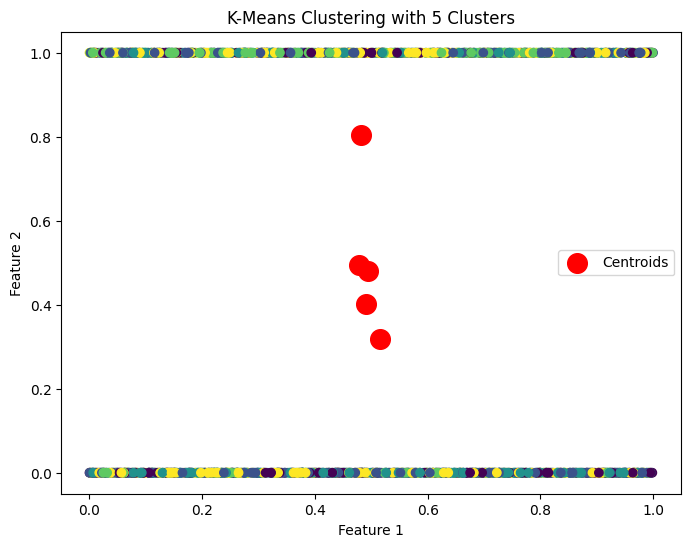

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membaca dataset yang telah di-preprocessing (X_scaled)
data = pd.DataFrame(X_scaled, columns=X.columns)  # Menggunakan data yang telah di-scaling sebelumnya

# Menentukan jumlah cluster (k) yang diinginkan
k = 5

# Membangun model K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Menampilkan data dengan label cluster
print(data)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title(f'K-Means Clustering with {k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


---
#Soal No 4 Bagian B
---

In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score
silhouette_avg = silhouette_score(data, data['cluster'])

# Menampilkan silhouette score
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.21
